<a href="https://colab.research.google.com/github/emrahyurtlu/deep-learning/blob/main/CMPE430/Lab_10_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CMPE430 LAB WEEK 10 - Regression Example**

23.12.2021 Thursday 14:30-16:20

Lab Assistant : Cansen Çağlayan (cansen.caglayan@atilim.edu.tr)

**References**

Book : Deep Learning with Python, François Chollet

https://www.tensorflow.org/tutorials/keras/regression

Another common type of machine-learning problem is regression, which consists of predicting a continuous value instead of a discrete label:

* for instance, predicting the temperature tomorrow, given
meteorological data; or

* predicting the time that a software project will take to complete,
given its specifications.

-- continuous value:
Any value between 0 – 200
(infinitve # of values)

-- discrete label:
One selected value from
a list {hot, cold}

**Note :** Don’t confuse regression and the algorithm **logistic regression**. Confusingly, logistic regression isn’t a regression algorithm—it’s a **classification** algorithm.

In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability.

This tutorial uses the classic Auto MPG (miles per gallon) dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, you will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

The Auto MPG dataset : https://archive.ics.uci.edu/ml/index.php


In [ ]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

#Load the Data

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


##Clean the data
If the dataset contains a unknown values, drop them :

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


#Split the data into training and test sets
Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#Split features from labels
Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

#**Linear regression with one variable**
Begin with a single-variable linear regression to predict **'MPG'** from **'Horsepower'**.

* Apply a linear transformation () to produce 1 output using a linear layer (tf.keras.layers.Dense).


In [ ]:
#Model 
horsepower_model = tf.keras.Sequential([
    layers.Dense(1)
    
])


This model will predict 'MPG' from 'Horsepower'.


In [ ]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = horsepower_model.fit(train_features['Horsepower'],train_labels,epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 34.5105 - val_loss: 15.8697
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 19.1652 - val_loss: 13.0934
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 13.5085 - val_loss: 14.7701
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 12.6288 - val_loss: 13.6991
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 12.5208 - val_loss: 12.7455
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 11.8021 - val_loss: 12.5669
Epoch 7/100
8/8 [==============================] - 0s 15ms/step - loss: 11.6798 - val_loss: 12.4609
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 11.6839 - val_loss: 12.3322
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 11.6050 - val_loss: 12.2134
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 11.6923 - val_loss: 12.2575
Epo

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

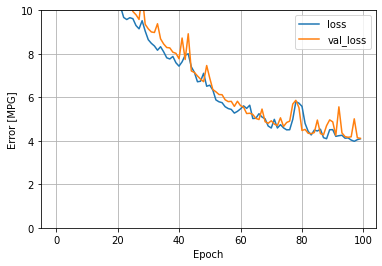

In [ ]:
plot_loss(history)

Collect the results on the test set for later:

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels)


3/3 [==============================] - 0s 4ms/step - loss: 4.0281


Since all models have been trained, you can review their test set performance:

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,4.028093


#**Linear regression with multiple inputs**
You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same  except that  is a matrix and  is a vector.



In [ ]:
linear_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

Configure the model with Keras Model.compile and train with Model.fit for 100 epochs:

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',)

In [ ]:
%%time
history = linear_model.fit(train_features,train_labels,epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 24ms/step - loss: 1787.3481 - val_loss: 23.0316
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 22.1934 - val_loss: 21.7411
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 20.2637 - val_loss: 19.4408
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 17.7842 - val_loss: 16.7549
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 14.9607 - val_loss: 13.7300
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 11.7677 - val_loss: 10.3959
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 8.5880 - val_loss: 7.7639
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 6.7084 - val_loss: 6.7491
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 6.3900 - val_loss: 6.5243
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 6.4614 - val_loss: 6.5360
Epoch 11/100
8

Using all the inputs in this regression model achieves a much lower training and validation error than the horsepower_model, which had one input:

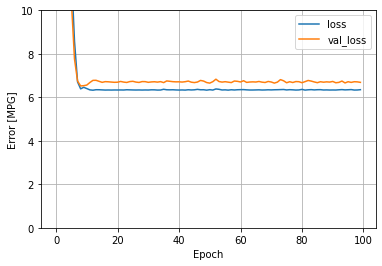

In [ ]:
plot_loss(history)

Collect the results on the test set for later:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 7.0196


In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,4.028093
linear_model,7.019552
